<a href="https://colab.research.google.com/github/leslie-zi-pan/kaggle-courses/blob/main/data_visualisation/Data_Visualisation_Scatter_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualisation - Scatter Plots
We will work with the insurance dataset. Let's visualise the dataset using scatter charts

## Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Kaggle data setup

### Authorise with kaggle json api key

In [2]:
! pip install kaggle
! rm -rf ~/.kaggle
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

### Download kaggle dataset

In [12]:
!kaggle datasets download -d alexisbcook/data-for-datavis
!unzip data-for-datavis

  0% 0.00/142k [00:00<?, ?B/s]
100% 142k/142k [00:00<00:00, 49.8MB/s]
Archive:  data-for-datavis.zip
  inflating: cancer.csv              
  inflating: cancer_b.csv            
  inflating: cancer_m.csv            
  inflating: candy.csv               
  inflating: fifa.csv                
  inflating: flight_delays.csv       
  inflating: ign_scores.csv          
  inflating: insurance.csv           
  inflating: iris.csv                
  inflating: iris_setosa.csv         
  inflating: iris_versicolor.csv     
  inflating: iris_virginica.csv      
  inflating: museum_visitors.csv     
  inflating: spotify.csv             


## Imports

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
# Add custom registry converters
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete')

Setup Complete


## Load the data

In [14]:
# Path of the file to read
insurance_data_path = 'insurance.csv'

# Read the file into a variable flight_delays_data
insurance_data = pd.read_csv(insurance_data_path)

## Examine data

In [15]:
insurance_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [16]:
# Print last rows using tail() function
insurance_data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


## Plot the BMI vs Charges

Scatter plot below suggests a positive correlation between bmi and the charges. 

We can check this by adding a regplot function. 

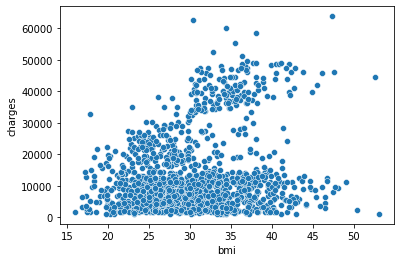

In [17]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

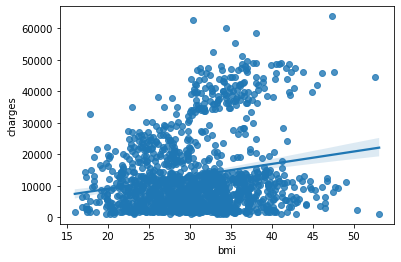

In [18]:
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

## Color coded scatter plots

Using coloder coded scatter plots can help use display the relationship between three variables. 

e.g. how smoking affects the relationship between BMI and the insurance costs. WE do this by color coding each service use by whether they smoke or not.

In [19]:
insurance_data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

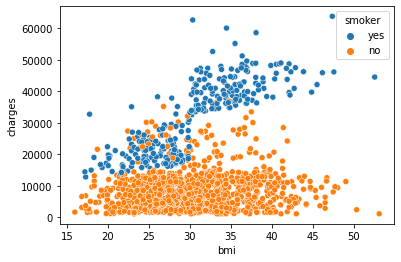

In [20]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

As with before, we can display the regression trend between the differnt hues using the lmplot function. 

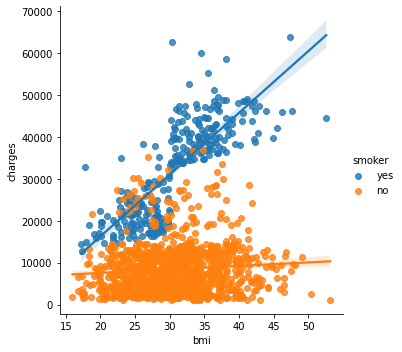

In [22]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=insurance_data)

## Swarm plot
Previous scatter plots highlight relationships between two continuous vairiables (e.g. BMI and charges). We can also adapt this to plot a categorical variable such as smoker on the main axes. 

This is build using the sns.swarmplot function. 

Among other things, this plot shows us that:
- Non-smokers pay, on average, less than smokers
- Customers who pay the most are smokers
- Customers who pay the least are non-smokers.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


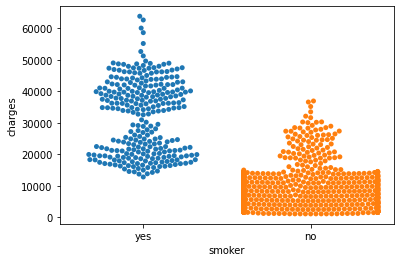

In [23]:
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'])